# Assigment 9

1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.
2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.
3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.
4. Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.
5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.
6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [5]:
!pip install chardet
!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 4.5 MB/s eta 0:00:00


In [91]:
import chardet
#import unidecode
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoSeries
from geopandas import GeoDataFrame
from pandas import Series, DataFrame
from shapely.geometry import Point, LineString

### 1. Importing data set of people infected with dengue

In [92]:
# Gettting the character format
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [93]:
casos_dengue = pd.read_csv( r'../../_data/data_dengue_peru.csv', encoding = charenc,  thousands = ",", dtype= {"Ubigeo":"str"})
casos_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


### 2.Generate ubigeo for Departments and Provinces

In [94]:
casos_dengue["UbigeoDep"] = casos_dengue["Ubigeo"].astype(str).str[:2]
casos_dengue["UbigeoPro"] = casos_dengue["Ubigeo"].astype(str).str[:4]
casos_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UbigeoDep,UbigeoPro
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


### 3. Plot the number of cases in 2021 by the district

In [95]:
# Importar shapefiles de los distritos
distritos_shp = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI')
distritos_shp = distritos_shp[['UBIGEO', 'geometry']]
distritos_shp = distritos_shp.rename({'UBIGEO':'Ubigeo'}, axis = 1)
distritos_shp

,Ubigeo,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [96]:
# Unir archivos
distritos_dengue = pd.merge(casos_dengue, distritos_shp, on="Ubigeo")
distritos_dengue = distritos_dengue[distritos_dengue["Año"] == 2021]
distritos_dengue = distritos_dengue[["Ubigeo", "Casos", "geometry"]]
distritos_dengue = distritos_dengue.groupby(["Ubigeo"]).sum().reset_index()
distritos_dengue = distritos_dengue.merge(distritos_shp[["Ubigeo", "geometry"]], on = "Ubigeo")
# Agregar valores NaN
distritos_dengue = distritos_dengue[["Ubigeo", "Casos"]].merge(distritos_shp[["Ubigeo", "geometry"]], how = "right", on = "Ubigeo")
# Convertir el df a geodataframe
distritos_dengue = GeoDataFrame(distritos_dengue)

<ipython-input-96-be576b5f097e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  distritos_dengue = distritos_dengue.groupby(["Ubigeo"]).sum().reset_index()


Text(0.5, 1.0, 'Casos de Dengue en 2021, a nivel de distritos')

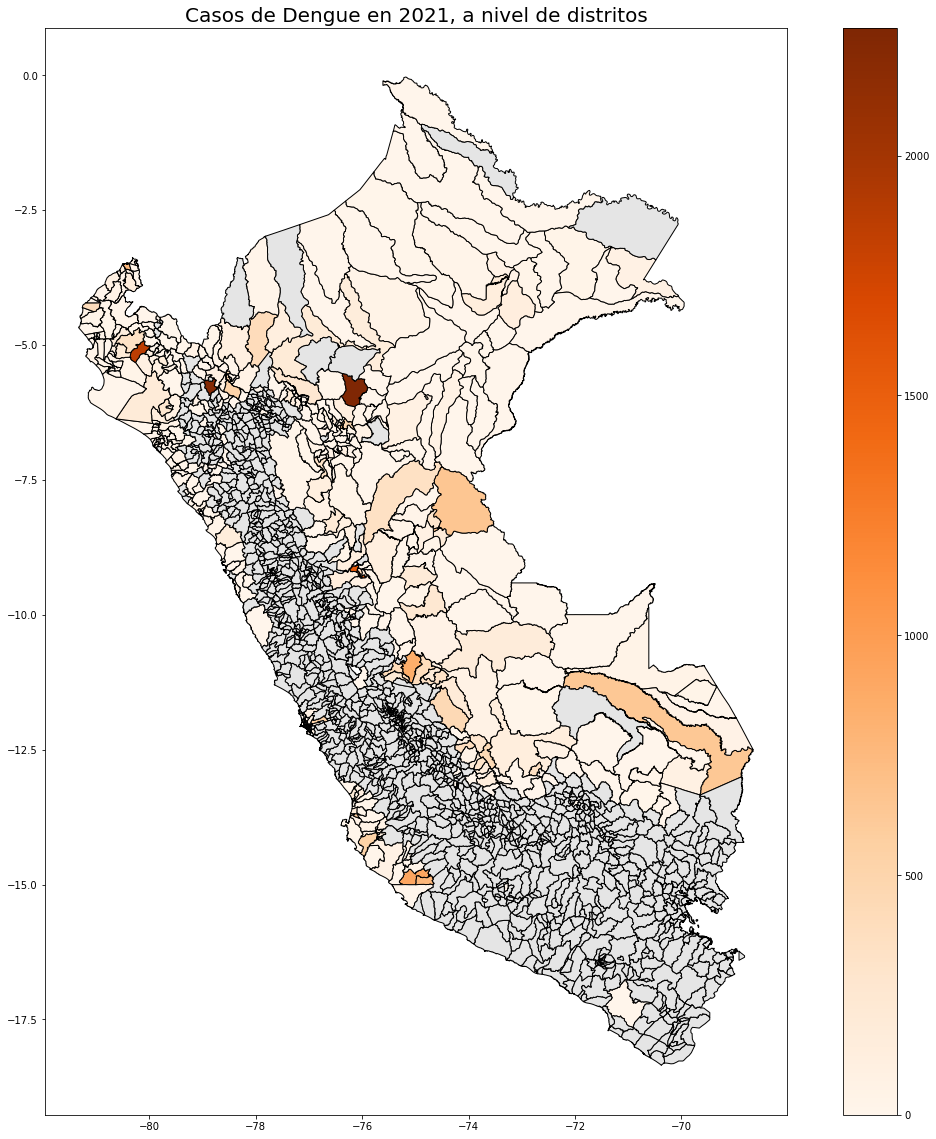

In [97]:
# Generar gráfico
distritos_dengue.plot( column='Casos', cmap='Oranges', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='black',
          legend = "True",
          missing_kwds= dict(color = "#E5E5E5"))

# Agregar título
plt.title("Casos de Dengue en 2021, a nivel de distritos", fontsize=20)

### 4. Plot the number of cases in 2021 by the department

In [98]:
#we print the data
casos_dengue

#we filter the data by the column "Year", 
#and specify the year that we require
#the new date is called "casos_dengue_2021"
casos_dengue_2021 = casos_dengue[casos_dengue["Año"] == 2021]

In [99]:
#Now we must group and add the cases by department
casos_dengue_departamento= casos_dengue_2021.groupby(["Departamento"]).sum().reset_index()


<ipython-input-99-e5b147c99889>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_dengue_departamento= casos_dengue_2021.groupby(["Departamento"]).sum().reset_index()


In [100]:
#We read a folder, and we apply the function, and create a new data "departamento_shp"
departamento_shp = gpd.read_file( r'../../_data/INEI_LIMITE_DEPARTAMENTAL')
#Now we have to modify the name of the DEPNAME column to be able to join this data later
departamento_shp = departamento_shp.rename({'NOMBDEP':'Departamento'}, axis = 1)


In [101]:
#Then we must jpin the data bases by means of the Department column
casos_dengue_departamento_2021 = casos_dengue_departamento.merge(departamento_shp, how = "right", on = "Departamento")


In [102]:
#We select the columns Departamento, Casos, geometry of the data casos_dengue_departamento_2021
casos_dengue_departamento_2021 = casos_dengue_departamento_2021[['Departamento', 'Casos', 'geometry']]
casos_dengue_departamento_2021

#We apply the GeoDataFrame function in to the data  
casos_dengue_departamento_2021_gdf = GeoDataFrame(casos_dengue_departamento_2021)

Text(0.5, 1.0, 'Casos de Dengue 2021 por Departamento')

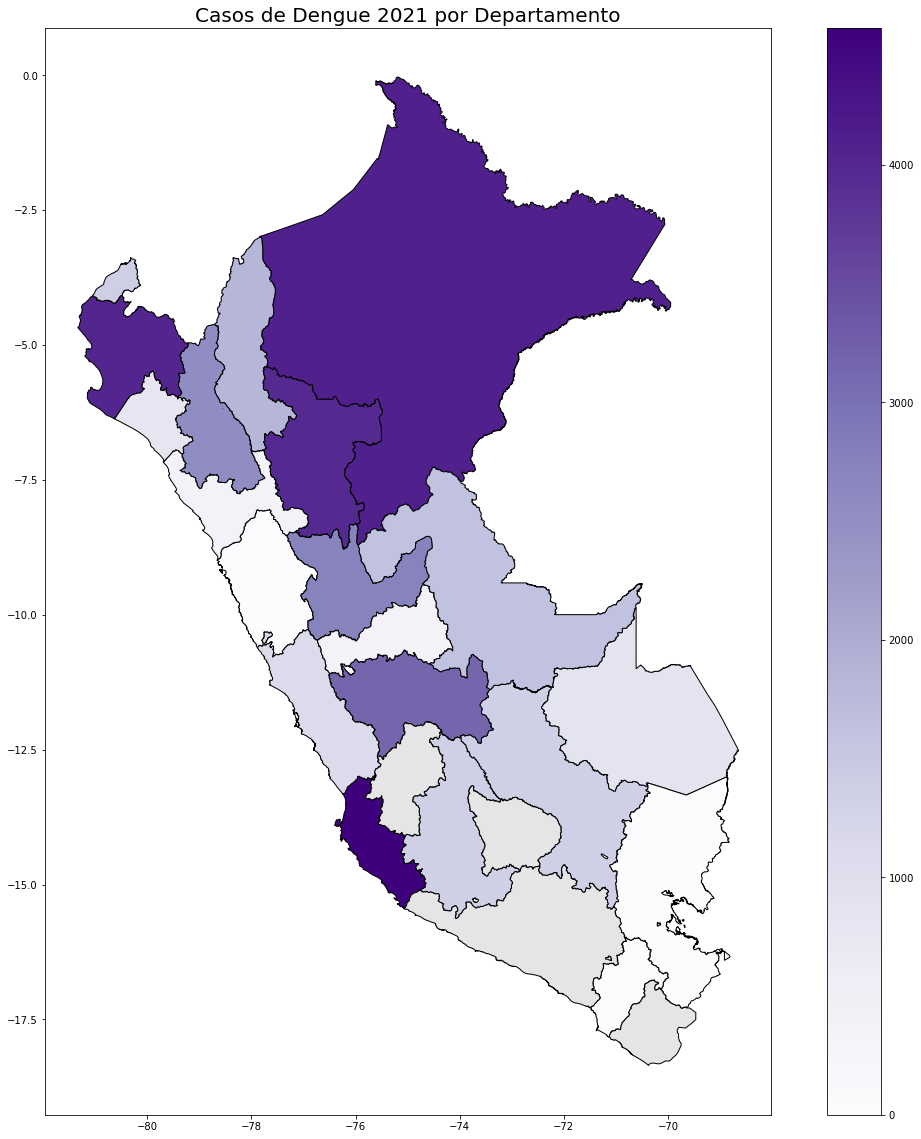

In [103]:
#We make teh grapg
casos_dengue_departamento_2021_gdf.plot( column='Casos', cmap='Purples', 
                                     figsize=(20, 20),
                                     linestyle='-',
                                     edgecolor='black',
                                     legend = "True",
                                     missing_kwds= dict(color = "#E5E5E5"))

#Title
plt.title("Casos de Dengue 2021 por Departamento", fontsize=20)

### 5. Plot the number of cases by the department for all the years

In [104]:
data_casos_dengue_anual = set(casos_dengue.Año)
data_casos_dengue_anual

{2015, 2016, 2017, 2018, 2019, 2020, 2021}

<ipython-input-105-7bc6f7698e99>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_dengue_departamento= casos_dengue_2021.groupby(["Departamento"]).sum().reset_index()
<ipython-input-105-7bc6f7698e99>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_dengue_departamento= casos_dengue_2021.groupby(["Departamento"]).sum().reset_index()
<ipython-input-105-7bc6f7698e99>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function

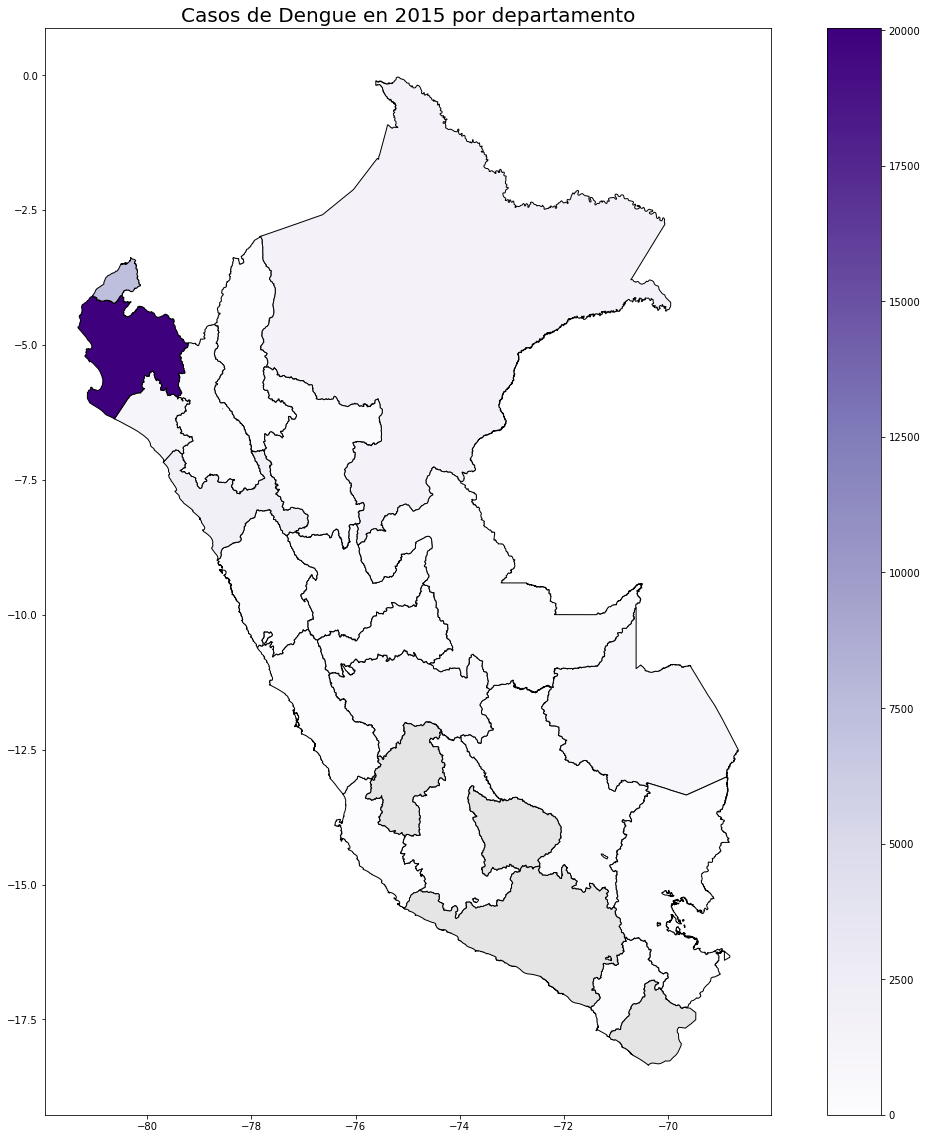

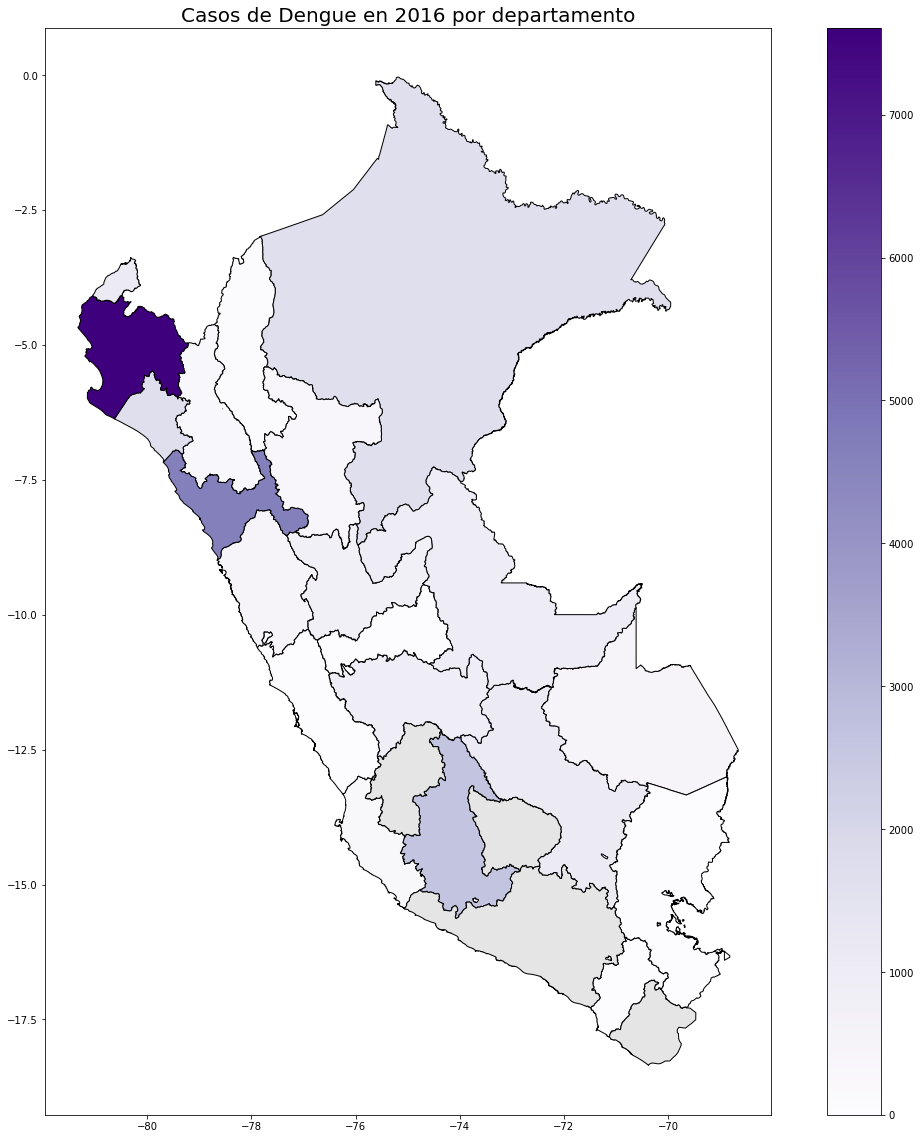

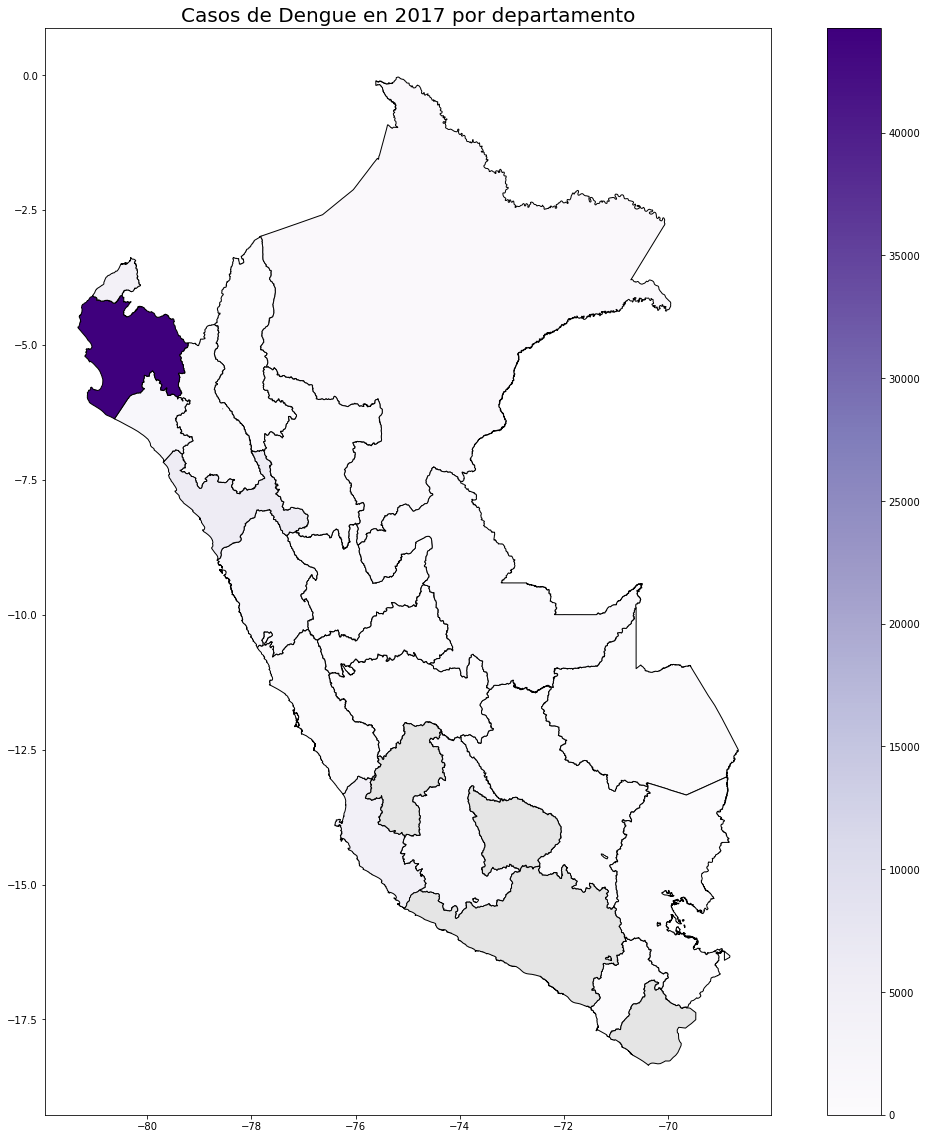

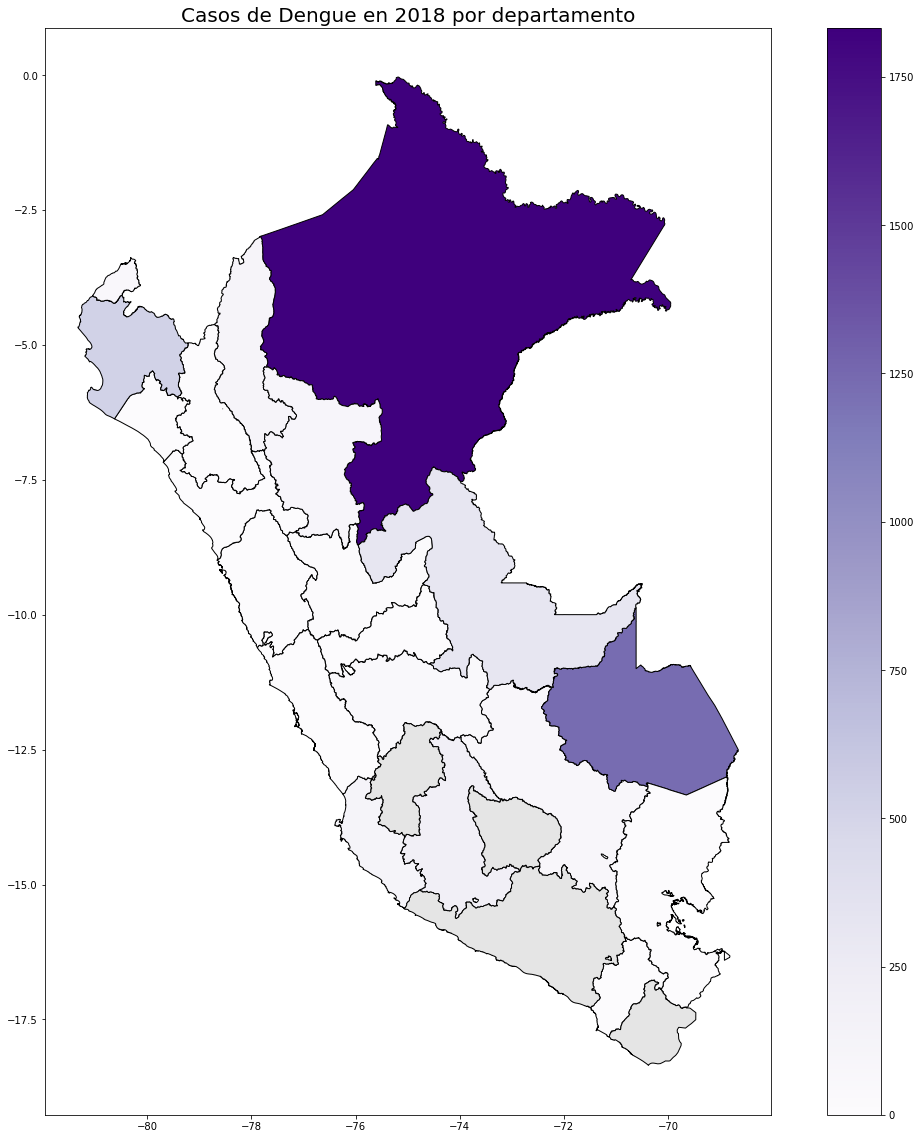

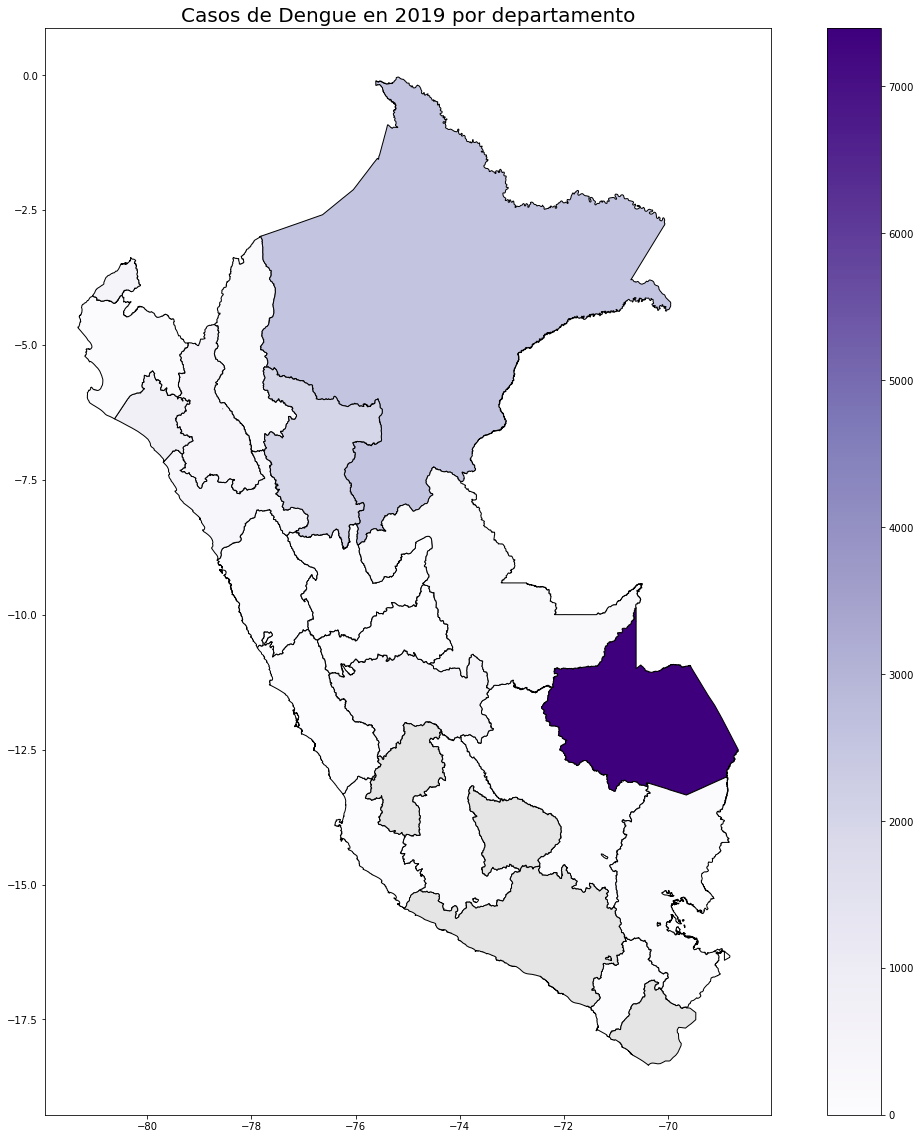

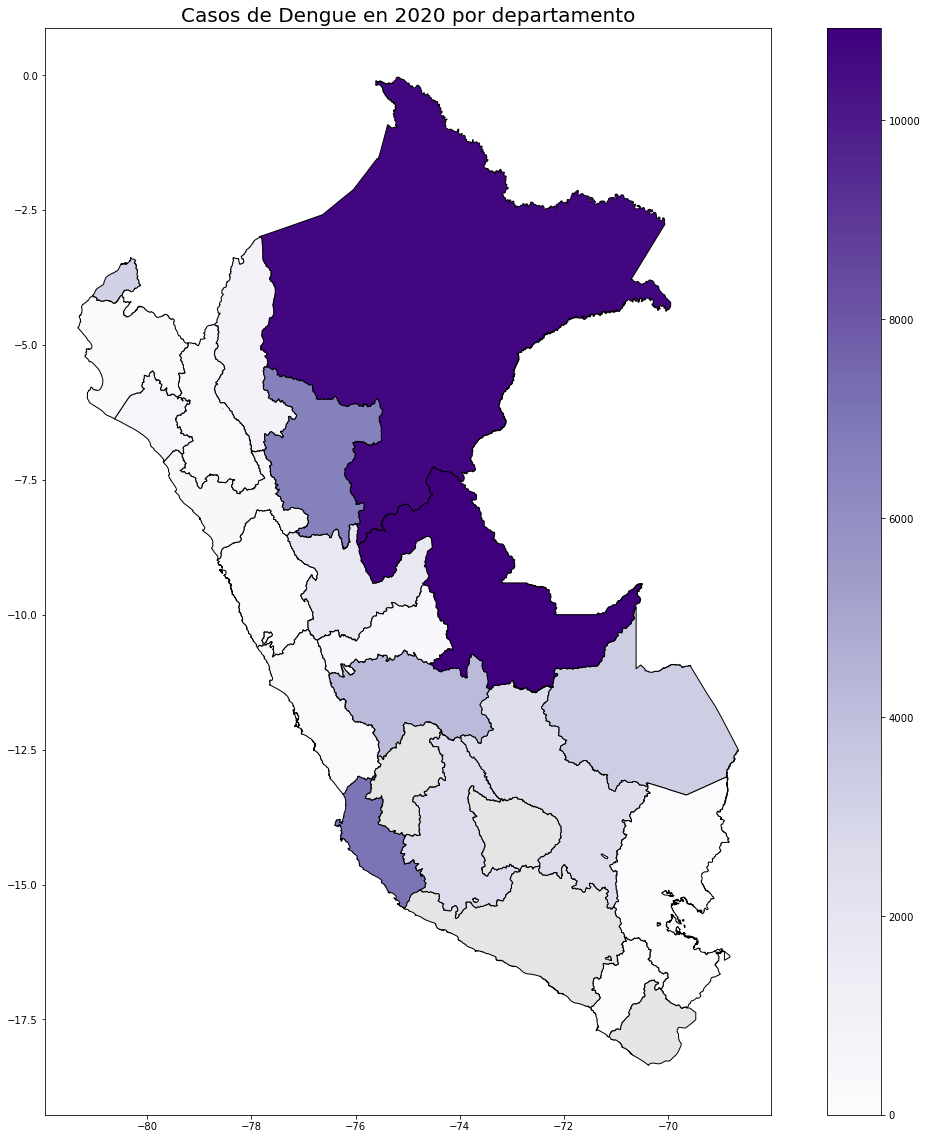

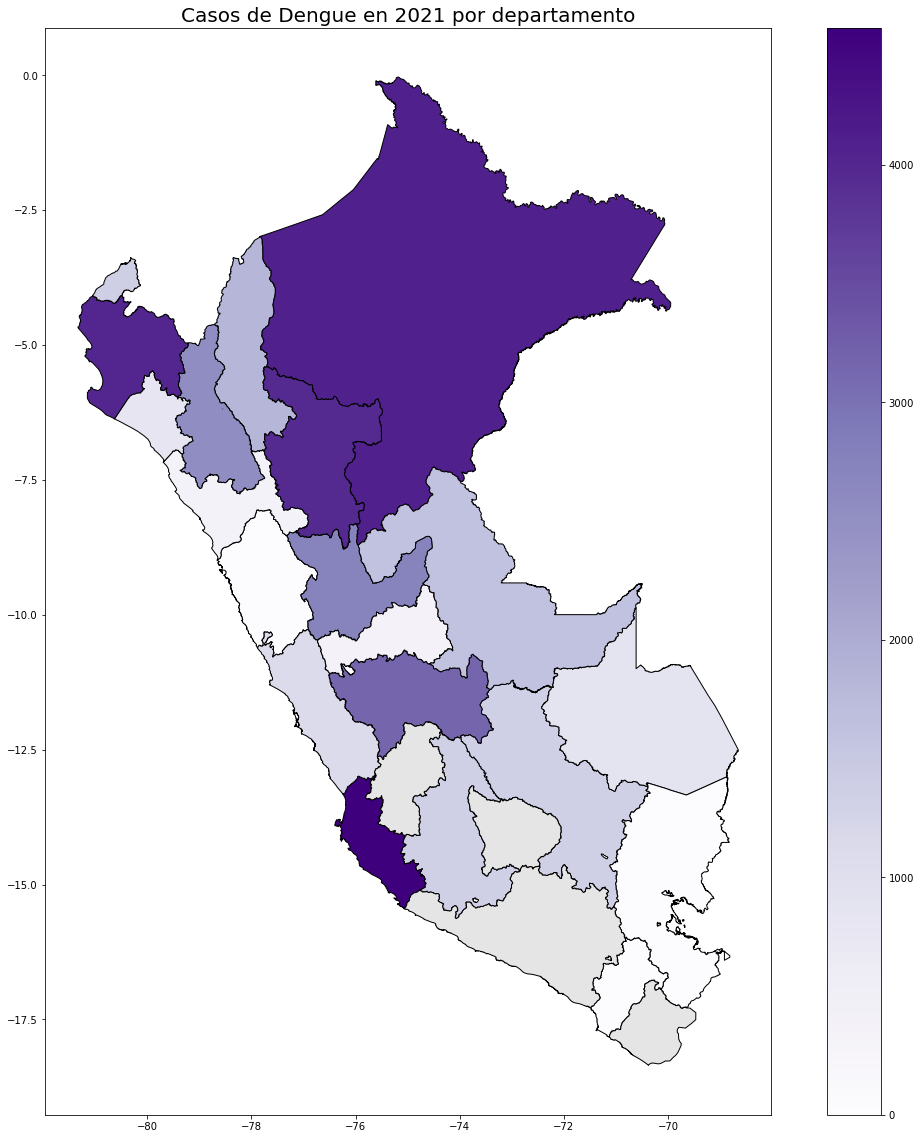

In [105]:
data_casos_dengue_anual = list(data_casos_dengue_anual)
data_casos_dengue_anual.sort()

for año in data_casos_dengue_anual:
    casos_dengue_2021 = casos_dengue[casos_dengue["Año"] == año]
    casos_dengue_departamento= casos_dengue_2021.groupby(["Departamento"]).sum().reset_index()
    casos_dengue_departamento_2021 = casos_dengue_departamento.merge(departamento_shp, how = "right", on = "Departamento")
    casos_dengue_departamento_2021 = casos_dengue_departamento_2021[['Departamento', 'Casos', 'geometry']]
    casos_dengue_departamento_2021_gdf = GeoDataFrame(casos_dengue_departamento_2021)
    
    plot = casos_dengue_departamento_2021_gdf.plot( column='Casos', cmap='Purples', 
                                     figsize=(20, 20),
                                     linestyle='-',
                                     edgecolor='black',
                                     legend = "True",
                                     missing_kwds= dict(color = "#E5E5E5"))
    plt.title(f"Casos de Dengue en {año} por departamento", fontsize=20)
    


### 6. Plot the number of cases by the department for all 2021 quarters 

In [149]:
casos_dengue_2021 = casos_dengue[casos_dengue["Año"] == 2021]
casos_dengue_2021['Trimestre'] = np.where(casos_dengue_2021['Semana']<13, 1,
                   np.where(casos_dengue_2021['Semana']<26, 2,
                   np.where(casos_dengue_2021['Semana']<39, 3, 4)))

<ipython-input-149-0664f080d194>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_dengue_2021['Trimestre'] = np.where(casos_dengue_2021['Semana']<13, 1,


In [152]:
list_trimestre = list(set(casos_dengue_2021.Trimestre))

<ipython-input-153-f91dce113b70>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_dengue_2021_tri_group= casos_dengue_2021_tri.groupby(["Departamento"]).sum().reset_index()
<ipython-input-153-f91dce113b70>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_dengue_2021_tri_group= casos_dengue_2021_tri.groupby(["Departamento"]).sum().reset_index()
<ipython-input-153-f91dce113b70>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for 

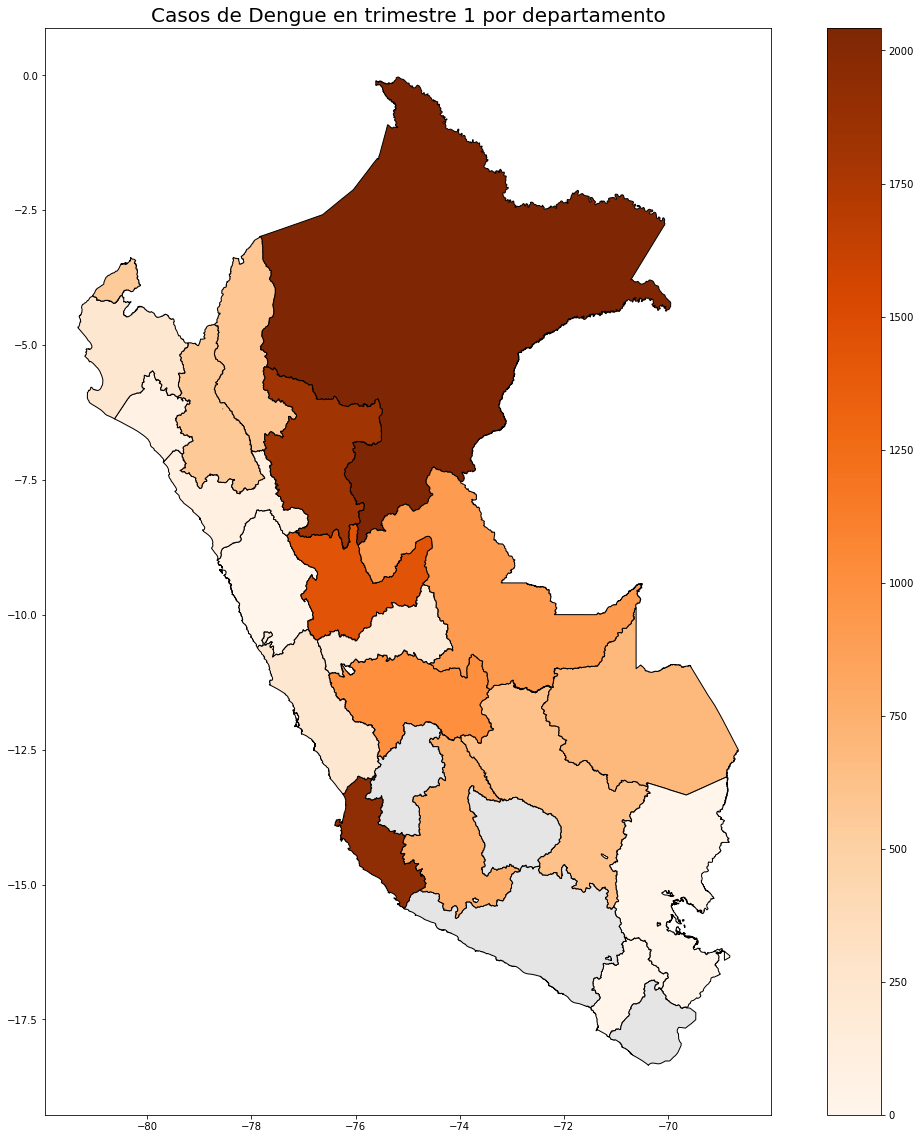

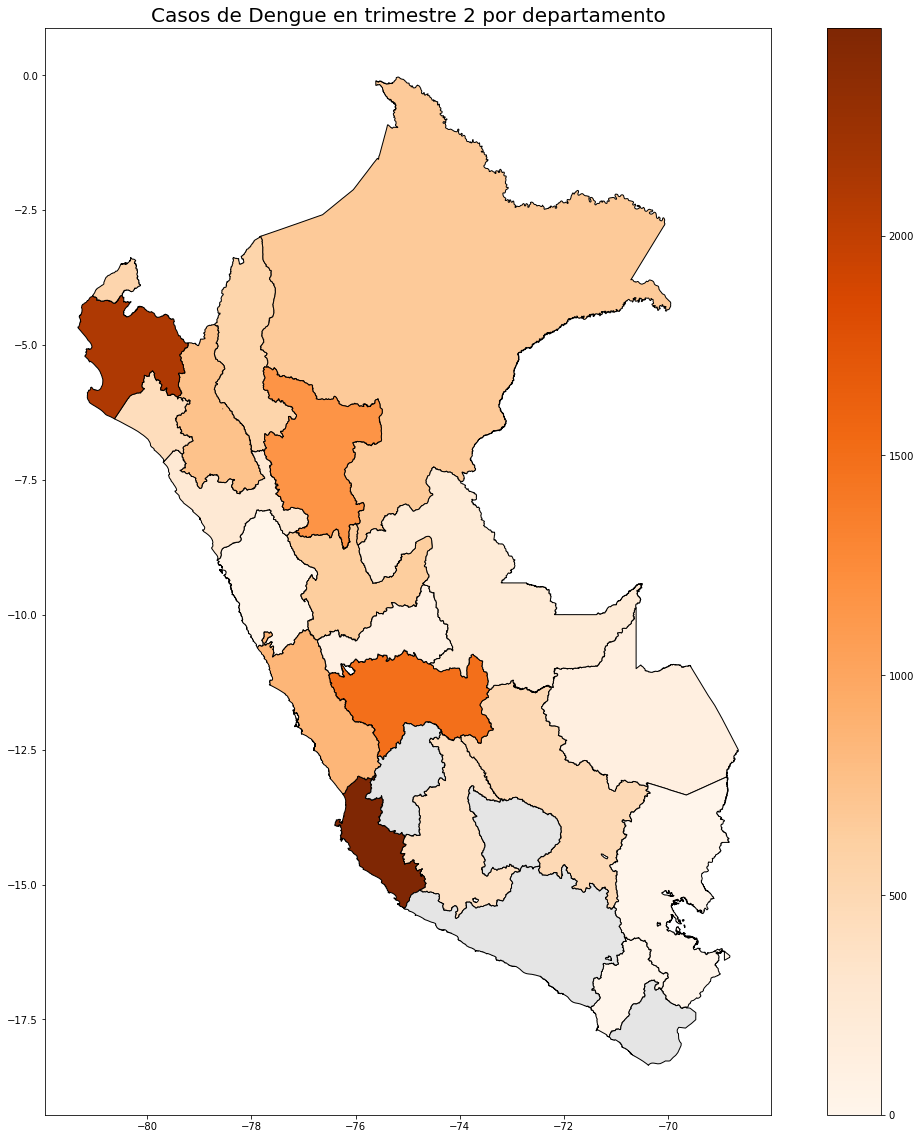

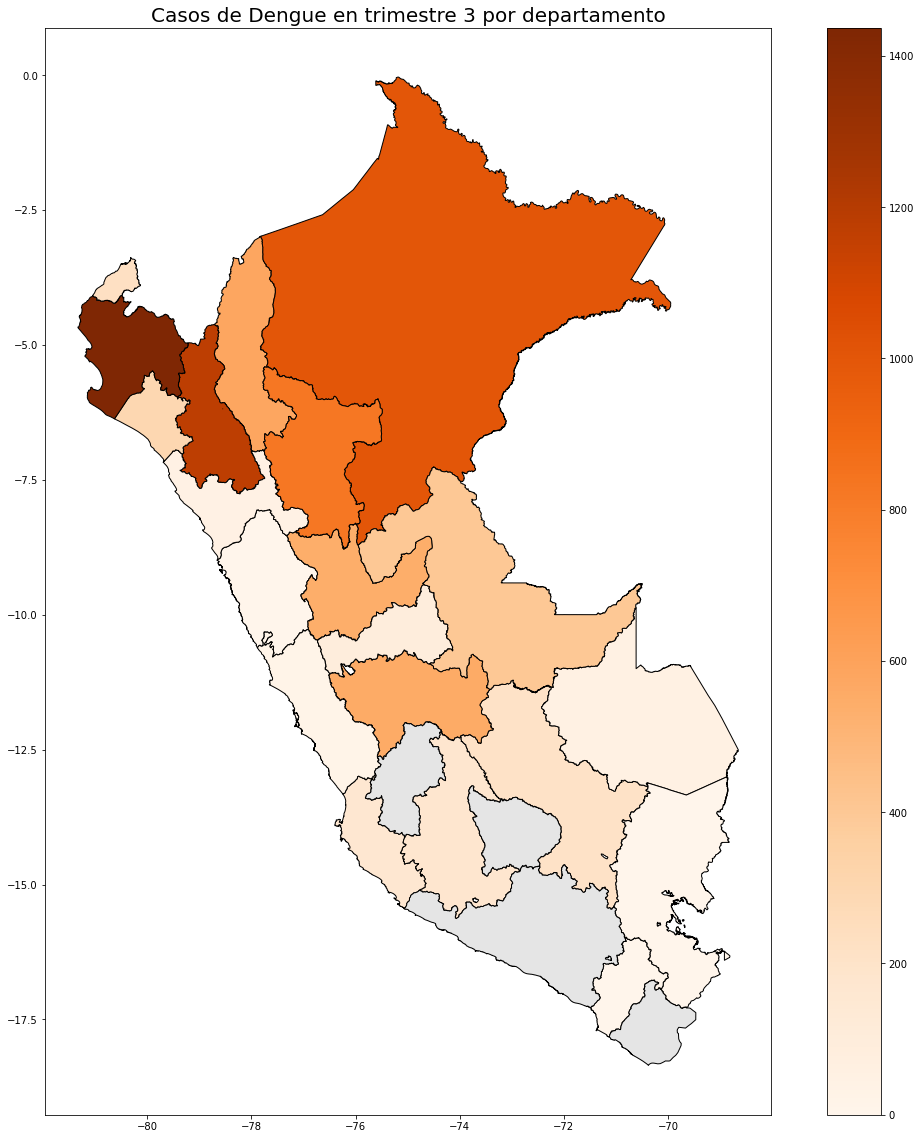

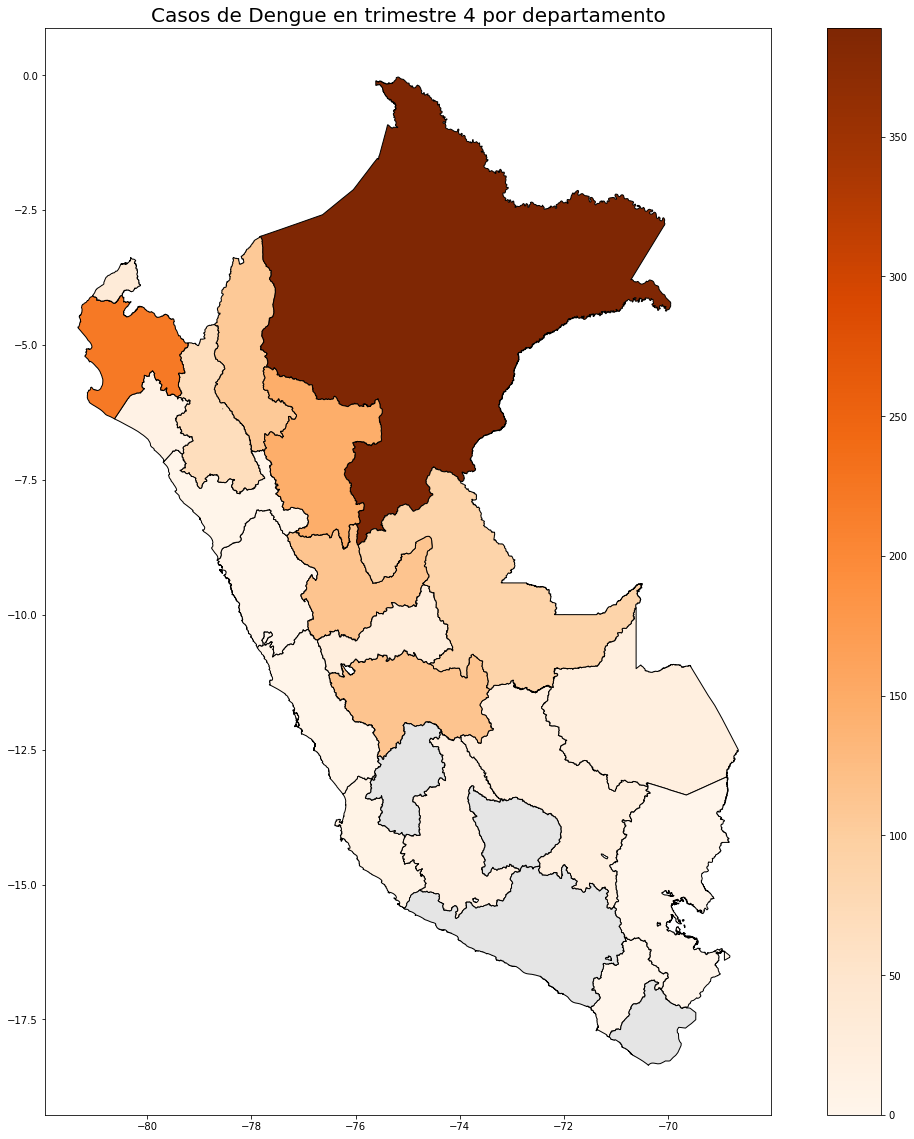

In [153]:
for trimestre in list_trimestre:
    casos_dengue_2021_tri = casos_dengue_2021[casos_dengue_2021["Trimestre"] == trimestre]
    casos_dengue_2021_tri_group= casos_dengue_2021_tri.groupby(["Departamento"]).sum().reset_index()
    casos_dengue_2021_tri_group_1 = casos_dengue_2021_tri_group.merge(departamento_shp, how = "right", on = "Departamento")
    casos_dengue_2021_tri_group_1 = casos_dengue_2021_tri_group_1[['Departamento', 'Casos', 'geometry']]
    casos_dengue_2021_tri_group_1_gdf = GeoDataFrame(casos_dengue_2021_tri_group_1)
    
    plot = casos_dengue_2021_tri_group_1_gdf.plot( column='Casos', cmap='Oranges', 
                                     figsize=(20, 20),
                                     linestyle='-',
                                     edgecolor='black',
                                     legend = "True",
                                     missing_kwds= dict(color = "#E5E5E5"))
    plt.title(f"Casos de Dengue en trimestre {trimestre} por departamento", fontsize=20)